Homework 5

Copy this notebook. Rename it as: YOURNAME-HW5-streams 

with your name replacing YOURNAME.

Upload your completed jupyter notebook to elearning site as your homework submission. You can put this notebook on your github.

5.1  Register for a stream of Twitter data

5.2  Create a bloom filter classifying two days worth of twitters  ( after removing stop words and urls )

5.3  For another days worth of twitter data find the previous twitters that match in the bloom filter
(This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

5.4 Plot a historgram of matches for each twitter in 5.3

For the 4-5 grade.- Submit in a separate notebook - YourNAME-Homework5-Supplement

1. Use a different machine learning training algorithm
2. Make a continous feed where you take two days of data and match the incoming stream ( do this for 5 days windowing the filter data)
3. Find new trends in the twitter feed (daily or hourly)
4. Or some other streaming exploration of your choosing

In [4]:
%%cmd
pip install tweepy

Microsoft Windows [Version 10.0.16299.125]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\Karthik\Anaconda3) C:\Users\Karthik\Downloads\Suppu>pip install tweepy

(C:\Users\Karthik\Anaconda3) C:\Users\Karthik\Downloads\Suppu>

In [ ]:
%%writefile twitter_streaming_sg.py
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
access_token = "925147453711683584-uokSHRKQ9yE3O8oKWAK7Mx38Rc2uOoT"
access_token_secret = "6PgetgqMvotN1zdj4BvqeWFgYcGUJeV5tL2sn1CaH3IQq"
consumer_key = "Ots6pNpRnsVYzZsjAR6RI6kud"
consumer_secret = "HJ7ViQh3jB6odaYontvLrNVpBgU6m3k9TVmiZzVLOmhMZ7WQmv"
class StdOutListener(StreamListener):

    def on_data(self, data):
        print (data)
        return True

    def on_error(self, status):
        print (status)


if __name__ == '__main__':
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)
    stream.filter(track=['Obama', 'Hillary', 'Trump'])

In [1]:
%%cmd
python twitter_streaming_sg1.py > twitter_streaming_sg1.py 

Microsoft Windows [Version 10.0.16299.125]
(c) 2017 Microsoft Corporation. All rights reserved.

C:\Users\Karthik\Downloads\Suppu>python twitter_streaming_sg1.py > twitter_streaming_sg1.py 

C:\Users\Karthik\Downloads\Suppu>

In [6]:
import json
import pandas as pd
tweets_data_path = 'sgarlap_tweets_1.txt '

tweets_data = []

tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
tweets = pd.DataFrame()
tweets['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets['created_at'] = [tweet.get('created_at','') for tweet in tweets_data]
tweets.head(7)

,text,lang,created_at
0,RT @T_S_P_O_O_K_Y: In some altenate universe s...,en,Tue Nov 21 03:25:03 +0000 2017
1,RT @AllenWestRepub: JUST IN: CLOSE FRIEND of H...,en,Tue Nov 21 03:25:03 +0000 2017
2,RT @realBigBalls: Our democracy could be lost ...,en,Tue Nov 21 03:25:03 +0000 2017
3,RT @SethAbramson: Trump wants:\n\n1) NFL to su...,en,Tue Nov 21 03:25:03 +0000 2017
4,RT @HoopsNBrews: Lavar Ball goes IN on Trump h...,en,Tue Nov 21 03:25:03 +0000 2017
5,@RealMichaelKay CNN is filling air time with l...,en,Tue Nov 21 03:25:03 +0000 2017
6,RT @IosrscIub: i had a dream that i was trying...,en,Tue Nov 21 03:25:03 +0000 2017


In [3]:
text=tweets['text']
text.head(7)

0    RT @T_S_P_O_O_K_Y: In some altenate universe s...
1    RT @AllenWestRepub: JUST IN: CLOSE FRIEND of H...
2    RT @realBigBalls: Our democracy could be lost ...
3    RT @SethAbramson: Trump wants:\n\n1) NFL to su...
4    RT @HoopsNBrews: Lavar Ball goes IN on Trump h...
5    @RealMichaelKay CNN is filling air time with l...
6    RT @IosrscIub: i had a dream that i was trying...
Name: text, dtype: object

In [4]:
import re
tweets['text'] = tweets['text'].str.replace('@', '', case=False)
tweets['text'] = tweets['text'].str.replace('RT', '', case=False)
tweets['text'] = tweets['text'].loc[tweets['lang']=='en']
tweets.head(7)

,text,lang,created_at
0,T_S_P_O_O_K_Y: In some altenate universe she ...,en,Tue Nov 21 03:25:03 +0000 2017
1,AllenWestRepub: JUST IN: CLOSE FRIEND of Hill...,en,Tue Nov 21 03:25:03 +0000 2017
2,realBigBalls: Our democracy could be lost but...,en,Tue Nov 21 03:25:03 +0000 2017
3,SethAbramson: Trump wants:\n\n1) NFL to suspe...,en,Tue Nov 21 03:25:03 +0000 2017
4,HoopsNBrews: Lavar Ball goes IN on Trump http...,en,Tue Nov 21 03:25:03 +0000 2017
5,RealMichaelKay CNN is filling air time with la...,en,Tue Nov 21 03:25:03 +0000 2017
6,IosrscIub: i had a dream that i was trying to...,en,Tue Nov 21 03:25:03 +0000 2017


Words in text format

In [5]:
list(tweets['text'].str.split(' ', expand=True).stack())

['',
 'T_S_P_O_O_K_Y:',
 'In',
 'some',
 'altenate',
 'universe',
 'she',
 'is',
 'President,',
 'and',
 "it's",
 'already',
 'becoming',
 'a',
 'living',
 'hell',
 'there...\nhttps://t.co/hRa6zWDRLt',
 '',
 'AllenWestRepub:',
 'JUST',
 'IN:',
 'CLOSE',
 'FRIEND',
 'of',
 'Hillary',
 'Clinton',
 'Who',
 'Planned',
 'To',
 '“Step',
 'Away',
 'From',
 'Politics”',
 'Found',
 'DEAD',
 'In',
 'Apparent',
 'Suicide',
 'https:…',
 '',
 'realBigBalls:',
 'Our',
 'democracy',
 'could',
 'be',
 'lost',
 'but',
 'hey,',
 'here',
 'is',
 'a',
 'stack',
 'of',
 'letters',
 'we',
 'sent',
 'https://t.co/wDtFeFvjCO',
 '',
 'SethAbramson:',
 'Trump',
 'wants:\n\n1)',
 'NFL',
 'to',
 'suspend',
 'Marshawn',
 'Lynch',
 'for',
 'a',
 'year',
 'for',
 'a',
 'peaceful',
 'pregame',
 'protest;\n\n2)',
 'China',
 'to',
 'imprison',
 '3',
 'U…',
 '',
 '',
 'HoopsNBrews:',
 'Lavar',
 'Ball',
 'goes',
 'IN',
 'on',
 'Trump',
 'https://t.co/vGm45xAooc',
 'RealMichaelKay',
 'CNN',
 'is',
 'filling',
 'air',
 'ti

second Dataset

In [32]:
import json
import pandas as pd
tweets_data_path = 'sgarlap_final1.txt '

tweets_data = []

tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
tweets2 = pd.DataFrame()
tweets2['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets2['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets2['created_at'] = [tweet.get('created_at','') for tweet in tweets_data]
tweets2.head(7)

,text,lang,created_at
0,RT @mmpadellan: Hillary Clinton is much better...,en,Sat Nov 18 19:55:56 +0000 2017
1,"RT @JoyAnnReid: Then again, being the party of...",en,Sat Nov 18 19:55:56 +0000 2017
2,"RT @realident: She is @realDonaldTrump , you n...",en,Sat Nov 18 19:55:56 +0000 2017
3,"RT @Ideias_Radicais: Olha só, propina para a H...",pt,Sat Nov 18 19:55:57 +0000 2017
4,Inside Donald Trump’s One-Stop Parties: Attend...,en,Sat Nov 18 19:55:57 +0000 2017
5,RT @realDonaldTrump: Crooked Hillary Clinton i...,en,Sat Nov 18 19:55:57 +0000 2017
6,RT @CNN: Prosecutors will have to prove severa...,en,Sat Nov 18 19:55:57 +0000 2017


Cleaning data

In [33]:
tweets3= pd.DataFrame()
tweets3['text'] = tweets2['text'].loc[tweets2['lang']=='en']
tweets3['text'] = tweets2['text'].str.replace('@', '', case=False)
tweets3['text'] = tweets2['text'].str.replace('RT', '', case=False)
import re
def clean(text):
    regex = r'RT'
    return re.sub(regex, "", text)
tweets3['text'] = list(tweets3['text'].apply(lambda tweet: clean(tweet)))
tweets3.head(5)

,text
0,@mmpadellan: Hillary Clinton is much better a...
1,"@JoyAnnReid: Then again, being the pay of Med..."
2,"@realident: She is @realDonaldTrump , you nee..."
4,Inside Donald Trump’s One-Stop Paies: Attendee...
5,@realDonaldTrump: Crooked Hillary Clinton is ...


In [34]:
tweets7= pd.DataFrame()
tweets4['text'] = tweets3['text'].str.replace('#', '', case=False)
tweets5['text'] = tweets4['text'].str.replace(':', '', case=False)
tweets6['text'] = tweets5['text'].str.replace('@', '', case=False)
tweets7['text'] = tweets6['text'].str.replace(',', '', case=False)
tweets7.text.str.encode('utf-8').str.decode('ascii', 'ignore')
tweets7['text'] = tweets6['text'].str.replace('http\S+|www.\S+', '', case=False)
tweets7.head(20)

,text
0,mmpadellan Hillary Clinton is much better at ...
1,"JoyAnnReid Then again, being the pay of Medic..."
2,"realident She is realDonaldTrump , you need t..."
4,Inside Donald Trump’s One-Stop Paies Attendees...
5,realDonaldTrump Crooked Hillary Clinton is th...
6,CNN Prosecutors will have to prove several th...
7,KatTheHammer As my friend says BounceHillary
8,TheRickyDavila Daily Thought I miss President...
9,Didn't you vote for her on a couple of occasio...
10,maryanna3bc Alex Jones | Infowars repoer Mill...


In [23]:
tweets7.iloc[2,0]

' realident She is realDonaldTrump , you need to stop bringing HER up. You don’t shut up , which is SO good for the Democratic… '

In [25]:
%%cmd
pip install dynamic_pybloom

Microsoft Windows [Version 10.0.16299.125]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\Karthik\Anaconda3) C:\Users\Karthik\Downloads\Suppu>pip install dynamic_pybloom
  Running setup.py bdist_wheel for dynamic-pybloom: started
  Running setup.py bdist_wheel for dynamic-pybloom: finished with status 'done'
  Stored in directory: C:\Users\Karthik\AppData\Local\pip\Cache\wheels\c1\86\a1\ebfe582d42fb86f612824467cf6bb7de558115f3338b104368
Successfully built dynamic-pybloom

(C:\Users\Karthik\Anaconda3) C:\Users\Karthik\Downloads\Suppu>

I have tried to use dynamic_pybloom filter

In [35]:
from dynamic_pybloom import ScalableBloomFilter
sbf = ScalableBloomFilter(mode=ScalableBloomFilter.SMALL_SET_GROWTH)
for tweet in tweets:
    sbf.add(tweet)
match = 0
nomatch = 0
for tweets in tweets7:
    if tweet in sbf:
        match += 1
    else:
        nomatch += 1
    
print(match)
print(nomatch)

1
0


In [30]:
'realident She is realDonaldTrump , you need to stop bringing HER up.' in sbf

False

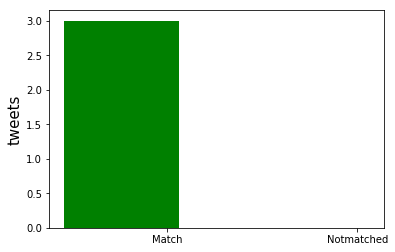

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
x_vars = ['Match', 'Notmatched']
x_pos = list(range(len(x_vars)))
y_pos = [match,nomatch]
width = 0.6
fig, ax = plt.subplots()
plt.bar(x_pos, y_pos, width, alpha=1, color='g')
ax.set_ylabel('tweets', fontsize=15)
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(x_vars)